In [1]:
id2label = {1: "text", 2: "title", 3: "list", 4: "table", 5: "figure"}

categories = []
for key, value in id2label.items():
    categories.append({'supercategory': '', 'id': key, 'name': value})

categories


[{'supercategory': '', 'id': 1, 'name': 'text'},
 {'supercategory': '', 'id': 2, 'name': 'title'},
 {'supercategory': '', 'id': 3, 'name': 'list'},
 {'supercategory': '', 'id': 4, 'name': 'table'},
 {'supercategory': '', 'id': 5, 'name': 'figure'}]

In [2]:
from pycocotools.coco import COCO
import json

# Load the COCO dataset file
coco = COCO('/home/bibekyess/mmcv/mmdetection/data/data/cdla_raw/CDLA/val/annotations.json')

# Define the mapping of old labels to new labels
label_mapping = {
    'Text': 'text',
    'Title': 'title',
    'Figure': 'figure',
    'Figure caption': 'text',
    'Table': 'table',
    'Table caption': 'text',
    'Referece': 'text',
    'Equation': 'list',
    'Header': 'title',
    'Footer': 'text'
}

label_id_mapping = {
    1: 1,
    2: 2,
    3: 5,
    4: 1,
    5: 4,
    6: 1,
    7: 2,
    8: 1,
    9: 1,
    10: 3
}



exclusion_section = {'_background_'}

ann_ids = coco.getAnnIds()
annotations = coco.loadAnns(ann_ids)

filtered_annotations = []
for ann in annotations:

    if coco.loadCats(ann['category_id'])[0]['name'] not in exclusion_section:
        ann['category_id'] = label_id_mapping[ann['category_id']]
        filtered_annotations.append(ann)

# filtered_annotations = [ann for ann in annotations if coco.loadCats(ann['category_id'])[0]['name'] not in exclusion_section]


# Update the annotations in the dataset
coco.dataset['annotations'] = filtered_annotations

coco.dataset['categories'] = categories

# Save the modified dataset to a new file
output_file = '/home/bibekyess/mmcv/mmdetection/data/data/cdla/annotations/val_annotations.json'
with open(output_file, 'w') as file:
    json.dump(coco.dataset, file)


loading annotations into memory...
Done (t=0.21s)
creating index...
index created!


0


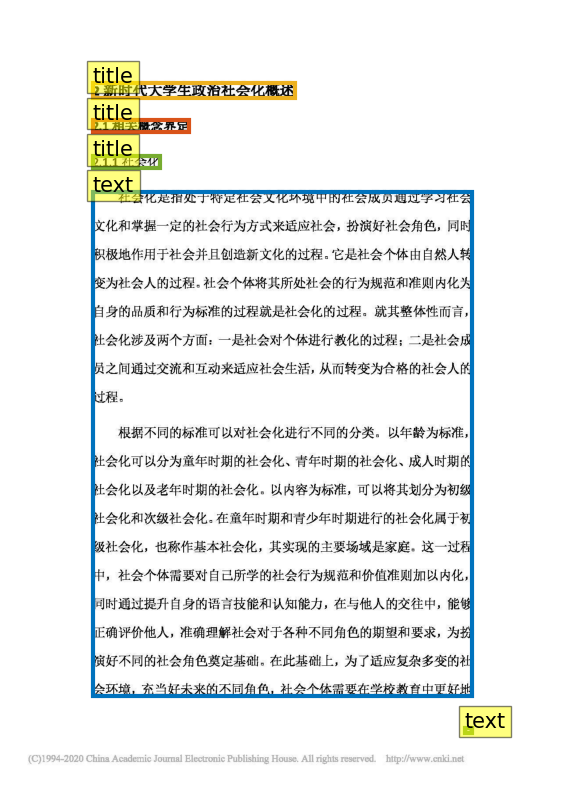

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json
import random

# Load annotations
with open('/home/bibekyess/mmcv/mmdetection/data/data/cdla/annotations/val_annotations.json', 'r') as f:
    annotations = json.load(f)

# Loop through images and annotations
for image_info in annotations['images']:
    image_path = image_info['file_name'].split("/")[-1]
    image = Image.open("/home/bibekyess/mmcv/mmdetection/data/data/cdla/val/" + image_path)

    # Get annotations for this image
    image_id = image_info['id']
    print(image_id)
    
    image_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == image_id]

    plt.figure(figsize=(16,10))
    plt.imshow(image)
    ax = plt.gca()
    colors = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]] * 100
    for annotation in image_annotations:
        bbox = annotation['bbox']
        label = id2label[annotation['category_id']]
        x, y, w, h = bbox
        ax.add_patch(plt.Rectangle((x, y), w, h,
                                fill=False, color=random.choice(colors), linewidth=3))
        text = f'{label}'
        ax.text(x, y, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    
    # Show plot
    plt.show()
    break


In [5]:
from pycocotools.coco import COCO
import json

# Load the COCO dataset file
coco = COCO('/home/bibekyess/mmcv/mmdetection/data/data/cdla_raw/CDLA/train/annotations.json')

# Define the mapping of old labels to new labels
label_mapping = {
    'Text': 'text',
    'Title': 'title',
    'Figure': 'figure',
    'Figure caption': 'text',
    'Table': 'table',
    'Table caption': 'text',
    'Referece': 'text',
    'Equation': 'list',
    'Header': 'title',
    'Footer': 'text'
}

label_id_mapping = {
    1: 1,
    2: 2,
    3: 5,
    4: 1,
    5: 4,
    6: 1,
    7: 2,
    8: 1,
    9: 1,
    10: 3
}



exclusion_section = {'_background_'}

ann_ids = coco.getAnnIds()
annotations = coco.loadAnns(ann_ids)

filtered_annotations = []
for ann in annotations:

    if coco.loadCats(ann['category_id'])[0]['name'] not in exclusion_section:
        ann['category_id'] = label_id_mapping[ann['category_id']]
        filtered_annotations.append(ann)

# filtered_annotations = [ann for ann in annotations if coco.loadCats(ann['category_id'])[0]['name'] not in exclusion_section]


# Update the annotations in the dataset
coco.dataset['annotations'] = filtered_annotations

coco.dataset['categories'] = categories

# Save the modified dataset to a new file
output_file = '/home/bibekyess/mmcv/mmdetection/data/data/cdla/annotations/train_annotations.json'
with open(output_file, 'w') as file:
    json.dump(coco.dataset, file)


loading annotations into memory...
Done (t=1.33s)
creating index...
index created!


0


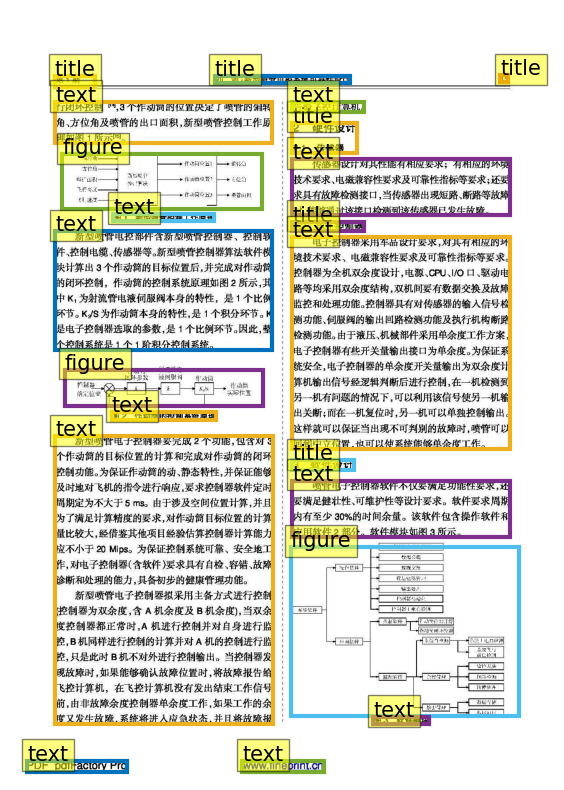

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json
import random

# Load annotations
with open('/home/bibekyess/mmcv/mmdetection/data/data/cdla/annotations/train_annotations.json', 'r') as f:
    annotations = json.load(f)

# Loop through images and annotations
for image_info in annotations['images']:
    image_path = image_info['file_name'].split("/")[-1]
    image = Image.open("/home/bibekyess/mmcv/mmdetection/data/data/cdla/train/" + image_path)

    # Get annotations for this image
    image_id = image_info['id']
    print(image_id)
    
    image_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == image_id]

    plt.figure(figsize=(16,10))
    plt.imshow(image)
    ax = plt.gca()
    colors = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]] * 100
    for annotation in image_annotations:
        bbox = annotation['bbox']
        label = id2label[annotation['category_id']]
        x, y, w, h = bbox
        ax.add_patch(plt.Rectangle((x, y), w, h,
                                fill=False, color=random.choice(colors), linewidth=3))
        text = f'{label}'
        ax.text(x, y, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    
    # Show plot
    plt.show()
    break
